### https://archive.ics.uci.edu/ml/datasets.html

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

y = df_wine['Class label'].values
X = df_wine.drop(['Class label'], axis=1).values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [2]:
X_train.shape

(124, 13)

In [3]:
y_train

array([1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1,
       0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0], dtype=int64)

In [4]:
from sklearn.metrics import accuracy_score

def accuracy(classifier, X_train, y_train, X_test, y_test):
    model = classifier.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    tree_train = accuracy_score(y_train, y_train_pred)
    tree_test = accuracy_score(y_test, y_test_pred)
    print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)


accuracy(tree, X_train, y_train, X_test, y_test)


Decision tree train/test accuracies 1.000/0.944


In [6]:
X = df_wine[['Alcohol', 'Hue']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
accuracy(tree, X_train, y_train, X_test, y_test)

Decision tree train/test accuracies 1.000/0.833


In [7]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

accuracy(bag, X_train, y_train, X_test, y_test)

Decision tree train/test accuracies 1.000/0.889


In [8]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

accuracy(boost, X_train, y_train, X_test, y_test)

Decision tree train/test accuracies 1.000/0.852


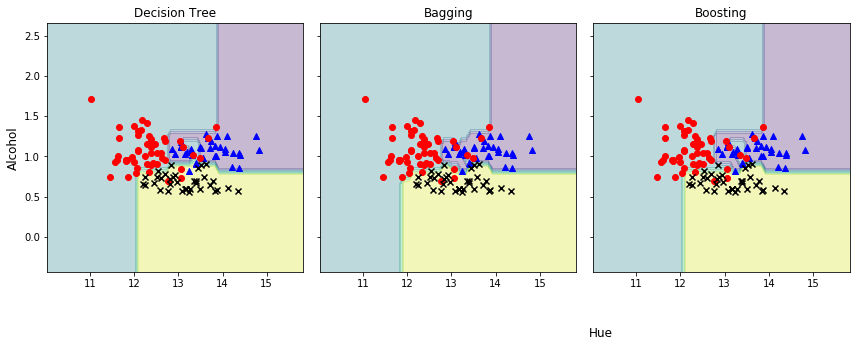

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=3, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(12, 5))


for idx, clf, tt in zip([0, 1, 2],
                        [tree, bag, boost],
                        ['Decision Tree', 'Bagging', 'Boosting']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='red', marker='o')
    
    axarr[idx].scatter(X_train[y_train == 2, 0],
                       X_train[y_train == 2, 1],
                       c='black', marker='x')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
         s='Hue',
         ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()
